In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy.stats import iqr

import warnings
warnings.filterwarnings('ignore')

# **Latar Belakang**

Perusahaan ini adalah perusahaan yang bergerak di bidang teknologi dan menawarkan layanan Software as a Service (SaaS). Perusahaan ini memiliki customer di berbagai negara di dunia yaitu di wilayah EMEA (Eastern Middle East Asia), AMER (America), dan APJ (Asia Pasifik Japan). Untuk meningkatkan performa sales dan profit, sehingga dilakukan analisis pada dataset untuk mendapatkan insight dan rekomendasi strategi.

# **Pernyataan Masalah**

Divisi Sales di perusahaan ingin mengetahui bagaimana perfoma sales, profit, dan profit margin agar dapat mengembangkan strategi yang lebih efektif. Berikut adalah pernyataan masalah yang ingin di analisis:

**1. Sales, Profit, Profit Margin Analysis**
- 1.a. Bagaimana tren sales dan profit berdasarkan quarter?
- 1.b. Bagaimana korelasi Sales, Discount, Profit, dan Profit Margin?

**2. Product Analysis**
- 2.a. Bagaimana sales, profit, dan profit margin dari setiap produk?

**3. Customer Analysis**
- 3.a. Pelanggan manakah yang paling sering melakukan pembelian?

**4. Geographical Analysis**
- 4.a. Negara manakah yang memiliki sales dan profit tertinggi?
- 4.b. Negara manakah yang memiliki profit dan profit margin terendah? 

# **Data**

In [2]:
data = pd.read_csv('Saas-Sales(1).csv')
data

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


Dataset ini berisi informasi sales di perusahaan Saas. Dataset ini memiliki 19 kolom, yaitu:
1. Row ID: A unique identifier for each transaction.
2. Order ID: A unique identifier for each order.
3. Order Date: The date when the order was placed.
4. Date Key: A numerical representation of the order date (YYYYMMDD).
5. Contact Name: The name of the person who placed the order.
6. Country: The country where the order was placed.
7. City: The city where the order was placed.
8. Region: The region where the order was placed.
9. Subregion: The subregion where the order was placed.
10. Customer: The name of the company that placed the order.
11. Customer ID: A unique identifier for each customer.
12. Industry: The industry the customer belongs to.
13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
14. Product: The product was ordered.
15. License: The license key for the product.
16. Sales: The total sales amount for the transaction.
17. Quantity: The total number of items in the transaction.
18. Discount: The discount applied to the transaction.
19. Profit: The profit from the transaction.

# **Data Understanding and Cleaning**

- Menampilkan informasi dari dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

- Cek missing values pada setiap kolom

In [4]:
data.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

- Cek baris yang duplikat

In [5]:
data.duplicated().sum()

0

- Menampilkan statistik deskriptif dari dataset

In [6]:
display(data.describe(), data.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


- Mengubah kolom Order Date menjadi format datetime

In [7]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.dtypes

Row ID                   int64
Order ID                object
Order Date      datetime64[ns]
Date Key                 int64
Contact Name            object
Country                 object
City                    object
Region                  object
Subregion               object
Customer                object
Customer ID              int64
Industry                object
Segment                 object
Product                 object
License                 object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object

- Menghapus kolom Date Key dan Row ID

Kolom Date Key dihapus karena isinya sama dengan kolom Order Date, hanya berbeda format.

Kolom Row ID dihapus karena tidak terlalu diperlukan untuk analisis data.

In [8]:
data.drop(columns=['Date Key', 'Row ID'], inplace=True)
data

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


- Menampilkan nilai unik di setiap kolom

In [9]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in data.columns :
    listItem.append( [col, data[col].nunique(), data[col].unique()])

dataDesc = pd.DataFrame(columns=['Nama Kolom', 'Jumlah nilai unik', 'Nilai Unik'],
                     data=listItem)
dataDesc

,Nama Kolom,Jumlah nilai unik,Nilai Unik
0,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
1,Order Date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 2021-10-11 00:00:00, 2020-06-09 00:00:00, 2023-04-16 00:00:00, 2022-12-06 00:00:00, 2021-11-22 00:00:00, 2020-11-11 00:00:00, 2020-05-13 00:00:00, 2020-08-27 00:00:00, 2022-12-10 00:00:00, 2023-07-17 00:00:00, 2021-09-25 00:00:00, 2022-01-16 00:00:00, 2021-09-17 00:00:00, 2023-10-20 00:00:00, 2022-12-09 00:00:00, 2021-12-27 00:00:00, 2023-09-11 00:00:00, 2022-07-18 00:00:00, 2023-09-20 00:00:00, 2022-03-12 00:00:00, 2020-10-20 00:00:00, 2022-06-21 00:00:00, 2021-04-18 00:00:00, 2022-12-12 00:00:00, 2022-06-18 00:00:00, 2021-11-24 00:00:00, 2021-04-30 00:00:00, 2020-12-05 00:00:00, 2022-06-05 00:00:00, 2022-09-19 00:00:00, 2023-09-15 00:00:00, 2021-04-26 00:00:00, 2023-12-10 00:00:00, 2020-11-26 00:00:00, 2020-10-12 00:00:00, 2021-09-03 00:00:00, 2023-11-14 00:00:00, 2023-05-29 00:00:00, 2023-10-27 00:00:00, 2022-04-06 00:00:00, 2022-09-18 00:00:00, 2021-01-31 00:00:00, 2023-11-07 00:00:00, 2023-11-10 00:00:00, 2023-06-18 00:00:00, 2022-09-07 00:00:00, 2022-08-30 00:00:00, 2022-12-02 00:00:00, 2021-11-13 00:00:00, 2023-11-24 00:00:00, 2021-10-15 00:00:00, 2023-12-26 00:00:00, 2022-11-04 00:00:00, 2020-08-25 00:00:00, 2021-03-02 00:00:00, 2021-04-05 00:00:00, 2020-12-26 00:00:00, 2020-09-20 00:00:00, 2023-11-06 00:00:00, 2022-11-07 00:00:00, 2023-02-03 00:00:00, 2022-10-14 00:00:00, 2022-09-06 00:00:00, 2023-09-19 00:00:00, 2023-12-23 00:00:00, 2021-09-07 00:00:00, 2020-10-22 00:00:00, 2022-03-14 00:00:00, 2021-05-31 00:00:00, 2021-05-28 00:00:00, 2020-03-01 00:00:00, 2022-11-21 00:00:00, 2022-05-12 00:00:00, 2021-12-28 00:00:00, 2022-11-17 00:00:00, 2022-11-08 00:00:00, 2020-09-08 00:00:00, 2020-08-05 00:00:00, 2020-09-14 00:00:00, 2023-04-22 00:00:00, 2021-11-21 00:00:00, 2021-12-15 00:00:00, 2020-11-19 00:00:00, 2022-11-29 00:00:00, 2020-08-26 00:00:00, 2022-07-17 00:00:00, 2021-10-12 00:00:00, 2021-10-31 00:00:00, 2020-03-21 00:00:00, 2023-07-07 00:00:00, 2023-06-25 00:00:00, 2020-08-03 00:00:00, 2023-12-18 00:00:00, 2023-06-04 00:00:00, 2023-12-02 00:00:00, 2021-02-09 00:00:00, 2021-01-02 00:00:00, 2022-10-29 00:00:00, ...]"
2,Contact Name,793,"[Nathan Bell, 

- Menampilkan distribusi data Sales, Quantity, Discount, dan Profit

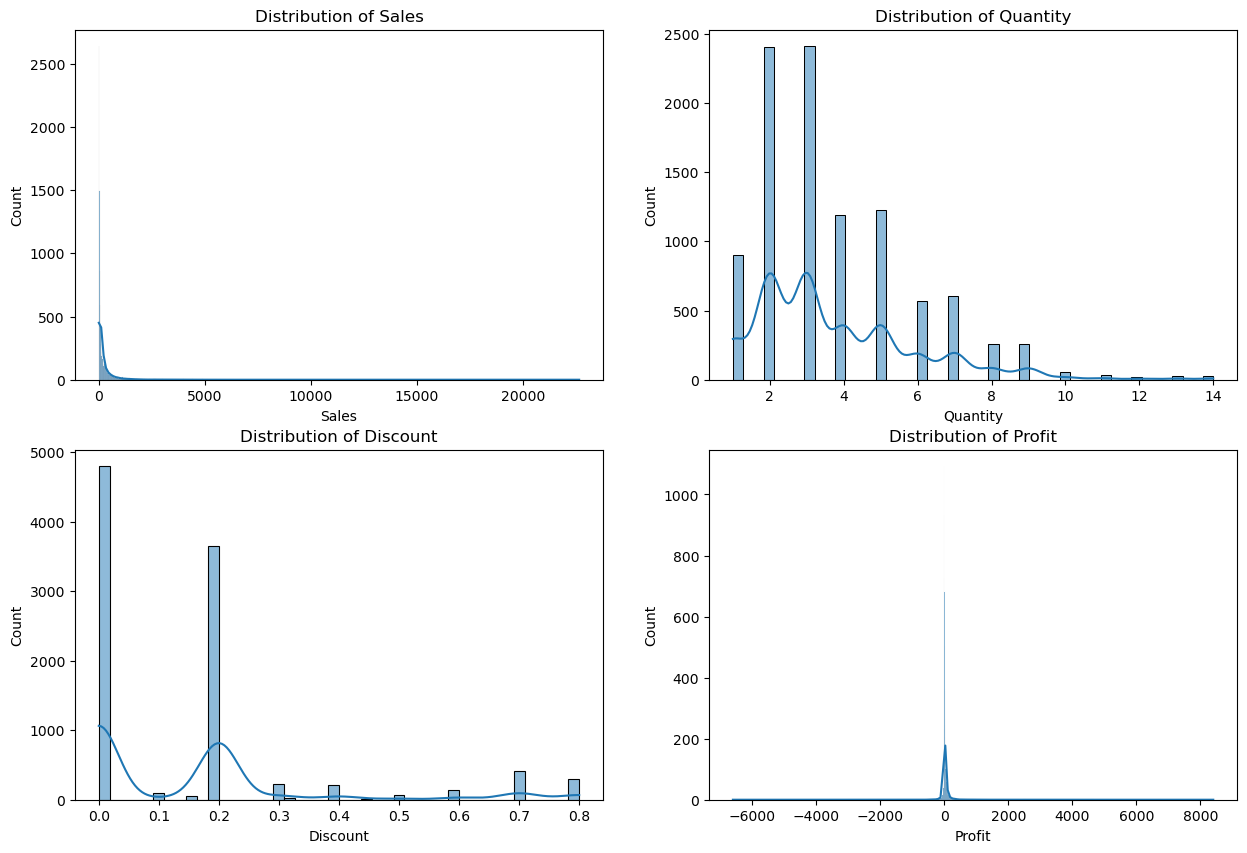

In [10]:
num_columns= ['Sales', 'Quantity', 'Discount', 'Profit']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes=axes.flatten()

for i,column in enumerate(num_columns):
    plt.plot()
    sns.histplot(data=data, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

plt.show()
    

- Cek outlier

<Axes: xlabel='Sales', ylabel='Profit'>

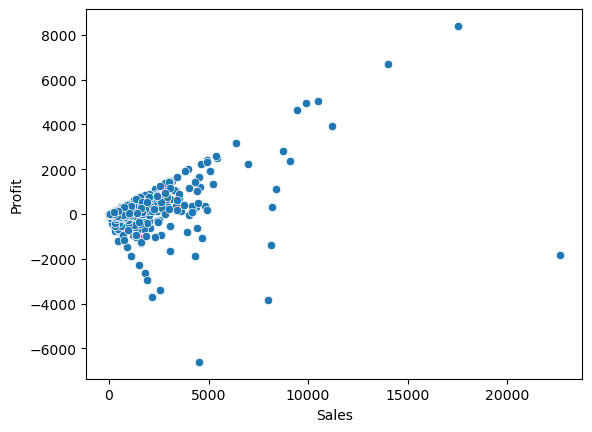

In [33]:
sns.scatterplot(data=data, x='Sales', y='Profit')

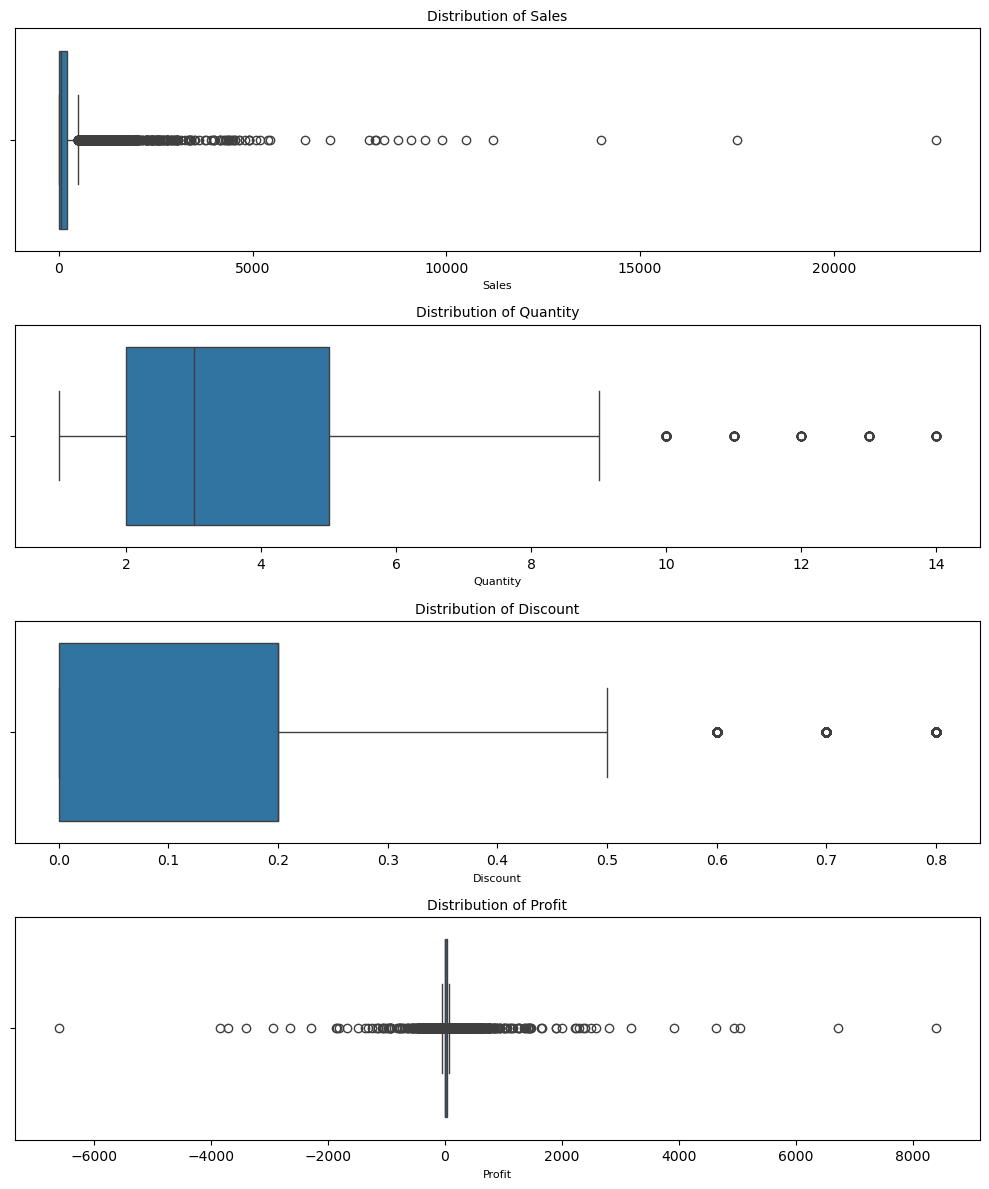

In [11]:
num_columns= ['Sales', 'Quantity', 'Discount', 'Profit']

fig, axes = plt.subplots(4, 1, figsize=(10,12))

for i, column in enumerate(num_columns):
    sns.boxplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}', fontsize=10)
    axes[i].set_xlabel(column, fontsize=8)

plt.tight_layout()
plt.show()

In [12]:
for i in ['Sales', 'Quantity', 'Discount', 'Profit']:
    Q1 = data[i].describe()['25%']
    Q3 = data[i].describe()['75%']
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = ((data[i] < lower) | (data[i] > upper)).sum()
    print(f'Jumlah outlier {i}: {outlier_count}')


Jumlah outlier Sales: 1167
Jumlah outlier Quantity: 170
Jumlah outlier Discount: 856
Jumlah outlier Profit: 1881


Terdapat banyak data outlier di kolom sales, quantity, discount, dan profit. Data tersebut tidak dihapus untuk menghindari data tidak merepresentasikan kondisi sebenarnya. Selain itu, kemungkinan ada kondisi yang membuat data tersebut menjadi outlier.

In [ ]:
# Menyimpan data yang sudah di cleaning ke file excel
data.to_excel('Saas-Sales_cleaned.xlsx')

**Kesimpulan dari data cleaning:**
- Di dalam dataset tidak ada data yang kosong.
- Di dalam dataset tidak ada data yang duplikat.
- Kolom Date Key dihapus karena isi datanya sama dengan kolom Order Date.
- Kolom Row ID dihapus karena tidak diperlukan untuk analisis data.
- Data Sales, Quantity, Discount, dan Profit tidak terdistribusi normal.
- Data outlier tidak dihapus untuk menghindari data yang digunakan tidak merepresentasikan kondisi sebenarnya.

## **Data Analysis**

In [14]:
data.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [15]:
# Membuat kolom baru yaitu Profit Margin
data['Profit Margin'] = (data['Profit'] / data['Sales'])
data.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,0.1600
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,0.3000
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,0.4700
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,-0.4000
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,0.1125


# **Sales, Profit, and Profit Margin Analysis**

**1.a. Tren Sales dan Profit berdasarkan quarter**

In [16]:
# Membuat kolom Quarter

data['Quarter'] = data['Order Date'].dt.to_period('Q').astype(str)

data.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin,Quarter
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,0.1600,2022Q4
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,0.3000,2022Q4
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,0.4700,2022Q2
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,-0.4000,2021Q4
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,0.1125,2021Q4


**Sales and Profit Trend by Quarter**

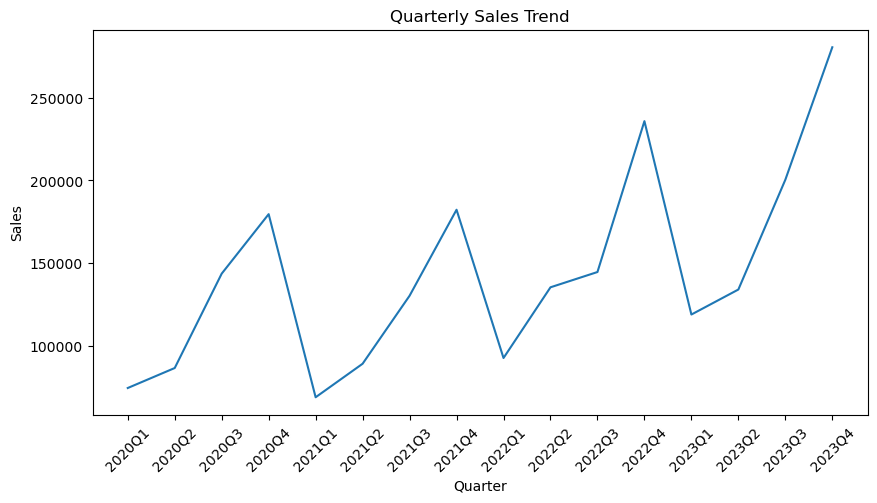

In [17]:
plt.figure(figsize=(10,5))

data_quarter = data.groupby('Quarter')['Sales'].sum().reset_index()

sns.lineplot(data = data_quarter,
             x = 'Quarter',
             y = 'Sales',
             ci=0)

plt.title('Quarterly Sales Trend')
plt.xticks(rotation = (45))
plt.show()

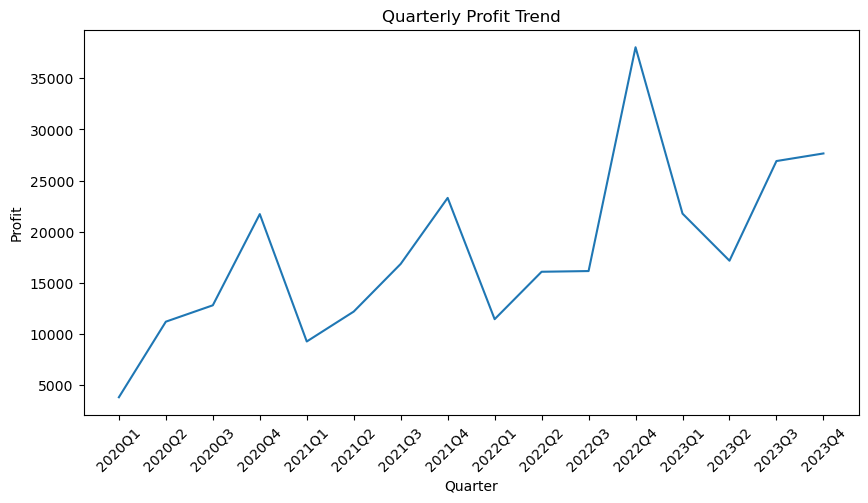

In [18]:
plt.figure(figsize=(10,5))

data_quarter2 = data.groupby('Quarter')['Profit'].sum().reset_index()

sns.lineplot(data = data_quarter2,
             x = 'Quarter',
             y = 'Profit',
             ci=0)


plt.xticks(rotation = (45))

plt.title('Quarterly Profit Trend')

plt.show()

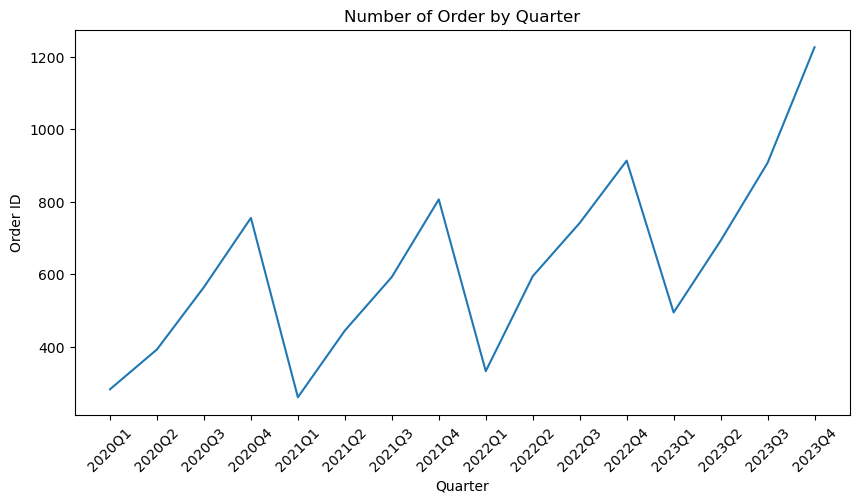

In [19]:
plt.figure(figsize=(10,5))

data_quarter3 = data.groupby('Quarter')['Order ID'].count().reset_index()

sns.lineplot(data = data_quarter3,
             x = 'Quarter',
             y = 'Order ID',
             ci=0)


plt.xticks(rotation = (45))

plt.title('Number of Order by Quarter')

plt.show()

**Insight:**

Sales dan profit selalu tinggi di Q4 setiap tahun. Selain itu, jumlah transaksi juga selalu tinggi di Q4.

**1.b. Korelasi sales, discount, profit, dan profit margin**

**Hubungan Sales dan Profit**

<function matplotlib.pyplot.show(close=None, block=None)>

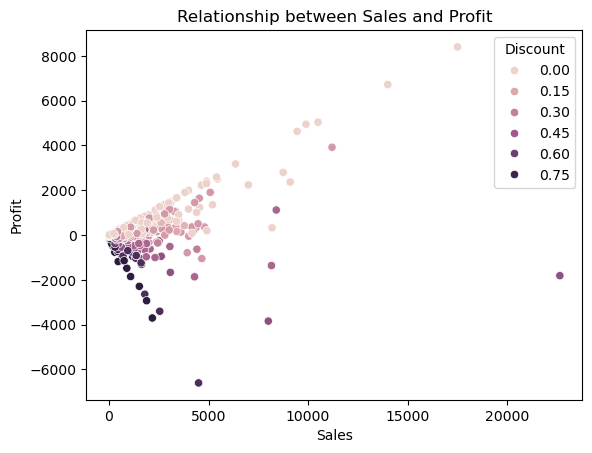

In [20]:
sns.scatterplot(data=data, x='Sales', y='Profit', hue='Discount')

plt.title('Relationship between Sales and Profit')
plt.show

**Korelasi Sales, Discount, Profit, dan Profit Margin**

Text(0.5, 1.0, 'Correlation Heatmap')

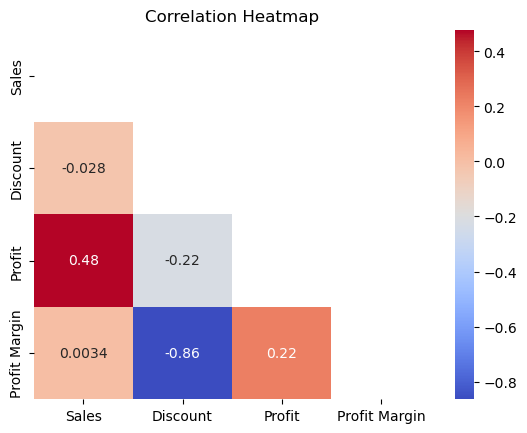

In [21]:
corr= data.corr(numeric_only=True)
corr = corr[['Sales', 'Discount', 'Profit', 'Profit Margin']]
corr = corr.drop(corr.index[[0,2]])

matrix_upper = np.triu(corr)
matrix_upper

sns.heatmap(data=corr, annot=True, cmap='coolwarm', mask=matrix_upper)

plt.title('Correlation Heatmap')

**Insight:**
- Pada grafik Relationship between Sales and Profit, dapat dilihat bahwa profit negatif lebih sering ditemukan pada transaksi dengan diskon tinggi.
- Sales dan Profit memiliki nilai korelasi sebesar 0.48 yang berarti korelasinya cukup kuat dan arah hubungannya positif.
- Sales dan Discount memiliki nilai korelasi sebesar -0.028 yang berarti korelasinya sangat lemah dan arah hubungannya negatif.
- Discount dan Profit Margin memiliki nilai korelasi sebesar -0.86 yang berarti korelasinya kuat dan arah hubungannya negatif.
- Profit dan Profit Margin memiliki nilai korelasi sebesar 0.22 yang berarti korelasinya lemah dan arah hubungannya positif.
- Sales dan Profit Margin memiliki nilai korelasi sebesar 0.0034 yang berarti korelasinya sangat lemah dan arah hubungannya positif.
- Discount dan Profit memiliki nilai korelasi sebesar -0.22 yang berarti korelasinya lemah dan arah hubungannya negatif.

# **Product analysis**

**2.a. Produk dengan sales, profit dan profit margin tertinggi**

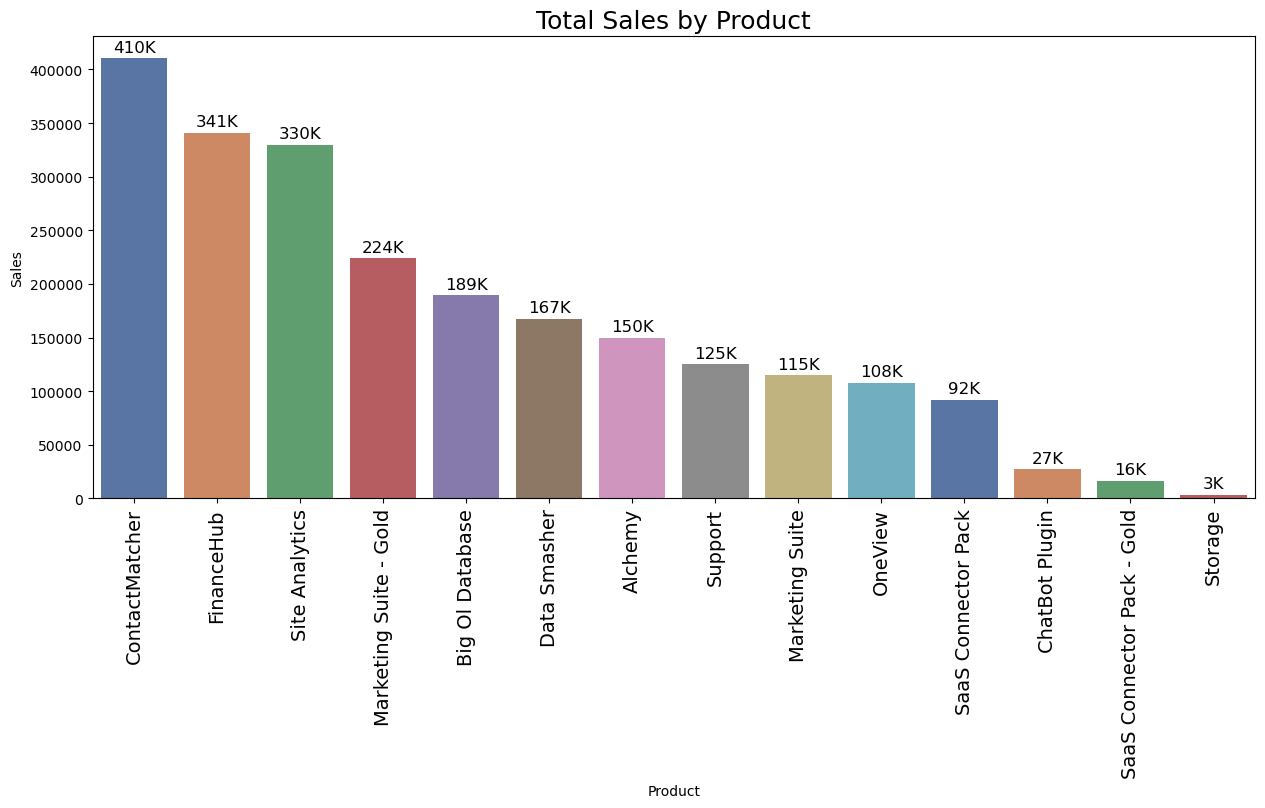

In [22]:
product_sales = data.groupby('Product')['Sales'].sum().reset_index().sort_values('Sales', ascending=False)

plt.figure(figsize=(15,6))

productsales_bar = sns.barplot(data=product_sales, x='Product', y='Sales', ci=0, palette='deep')
for x in productsales_bar.patches:
    productsales_bar.annotate(f'{x.get_height()/1000:.0f}K', 
                   (x.get_x() + x.get_width() / 2, 
                    x.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Total Sales by Product', fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.show()

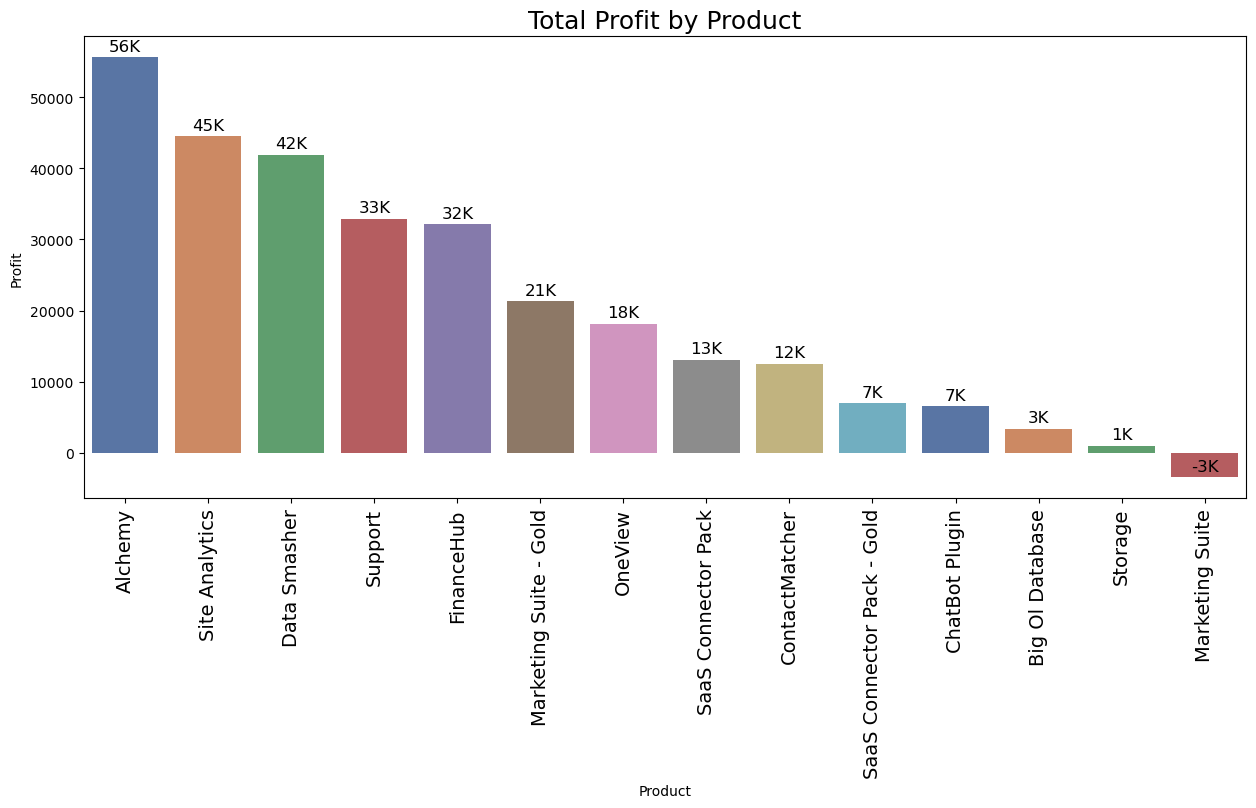

In [23]:
product_profit = data.groupby('Product')['Profit'].sum().reset_index().sort_values('Profit', ascending=False)

plt.figure(figsize=(15,6))

productprofit_bar = sns.barplot(data=product_profit, x='Product', y='Profit', ci=0, palette='deep')
for x in productprofit_bar.patches:
   productprofit_bar.annotate(f'{x.get_height()/1000:.0f}K', 
                   (x.get_x() + x.get_width() / 2, 
                    x.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Total Profit by Product', fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.show()

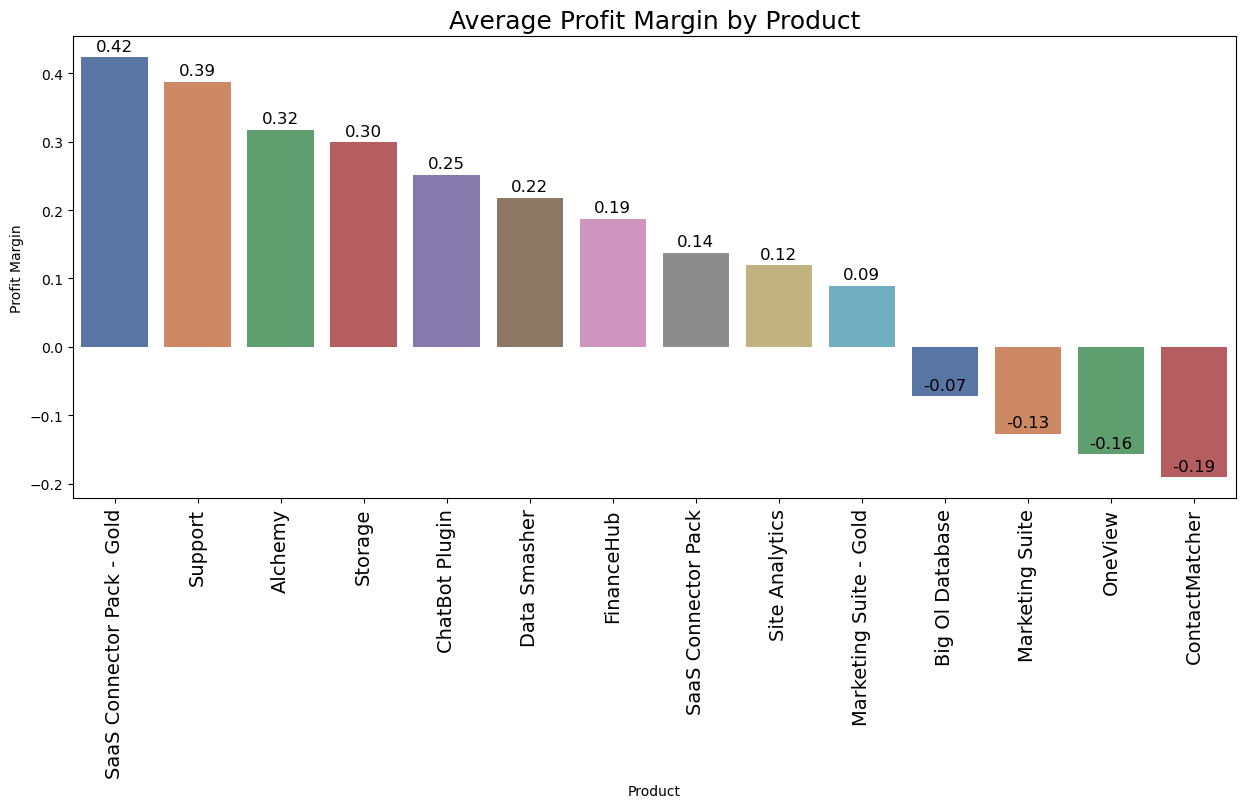

In [24]:
product_pm = data.groupby('Product')['Profit Margin'].mean().reset_index().sort_values('Profit Margin', ascending=False)
plt.figure(figsize=(15,6))

productpm_bar = sns.barplot(data=product_pm, x='Product', y='Profit Margin', ci=0, palette='deep')
for x in productpm_bar.patches:
    productpm_bar.annotate(format(x.get_height(), '.2f'), 
                   (x.get_x() + x.get_width() / 2, 
                    x.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Average Profit Margin by Product', fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.show()

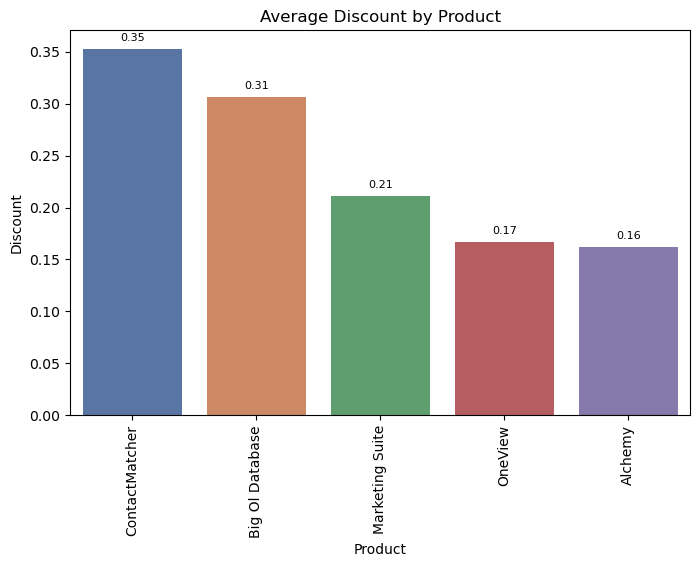

In [25]:
product_discount = data.groupby('Product')['Discount'].mean().reset_index().sort_values('Discount', ascending=False).head()

plt.figure(figsize=(8,5))

productdiscount_bar = sns.barplot(data=product_discount, x='Product', y='Discount', ci=0, palette='deep')
for x in productdiscount_bar.patches:
   productdiscount_bar.annotate(format(x.get_height(), '.2f'), 
                   (x.get_x() + x.get_width() / 2, 
                    x.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Average Discount by Product')
plt.xticks(rotation=90)
plt.show()

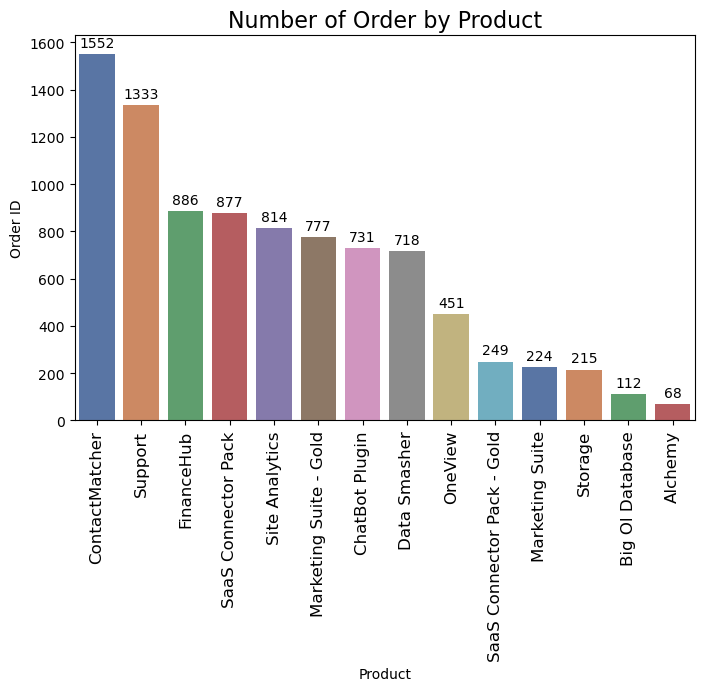

In [26]:
order_counts = data[['Order ID', 'Product']].drop_duplicates()

product_order = order_counts.groupby('Product')['Order ID'].count().reset_index().sort_values('Order ID', ascending=False)

plt.figure(figsize=(8,5))

productorder_bar = sns.barplot(data=product_order, x='Product', y='Order ID', ci=0, palette='deep')
for x in productorder_bar.patches:
   productorder_bar.annotate(format(x.get_height(), '.0f'), 
                   (x.get_x() + x.get_width() / 2, 
                    x.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Number of Order by Product', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.show()

**Insight:**
- 3 produk dengan sales tertinggi adalah ContactMatcher, FinanceHub, dan Sales Analytics.
- 3 produk dengan profit tertinggi adalah Alchemy, Site Analytics, dan Data Smasher.
- 3 produk dengan profit margin tertinggi adalah Saas Connector Pack - Gold, Alchemy, dan Storage.
- Produk dengan profit margin terendah adalah ContactMatcher.

# **Customer analysis**

3.a. Pelanggan yang sering melakukan transaksi pembelian produk

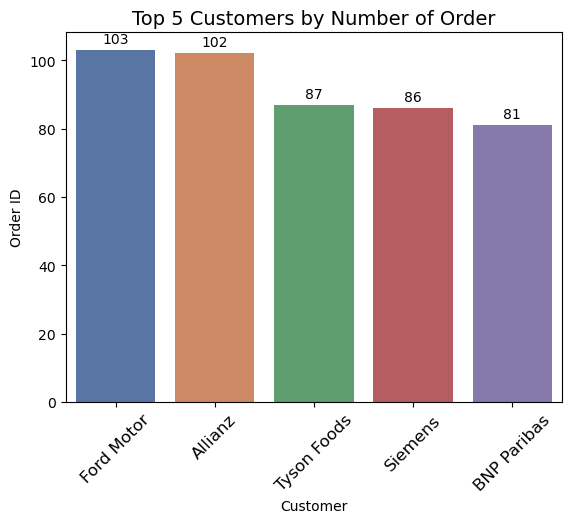

In [27]:
order_counts = data[['Order ID', 'Customer']].drop_duplicates()

customer_order = order_counts.groupby('Customer')['Order ID'].count().reset_index().sort_values('Order ID', ascending=False).head()

customerorder_bar = sns.barplot(data=customer_order, x='Customer', y='Order ID', ci=0, palette='deep')
for x in customerorder_bar.patches:
    customerorder_bar.annotate(format(x.get_height(), '.0f'), 
                   (x.get_x() + x.get_width() / 2, 
                    x.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Top 5 Customers by Number of Order', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

**Insight:**
- 5 Pelanggan yang sering melakukan pembelian di perusahaan adalah Ford Motor, Allianz, Tyson Foods, Siemens, dan BNP Paribas.

# **Geographical analysis**

**4.a. Negara dengan sales dan profit tertinggi**

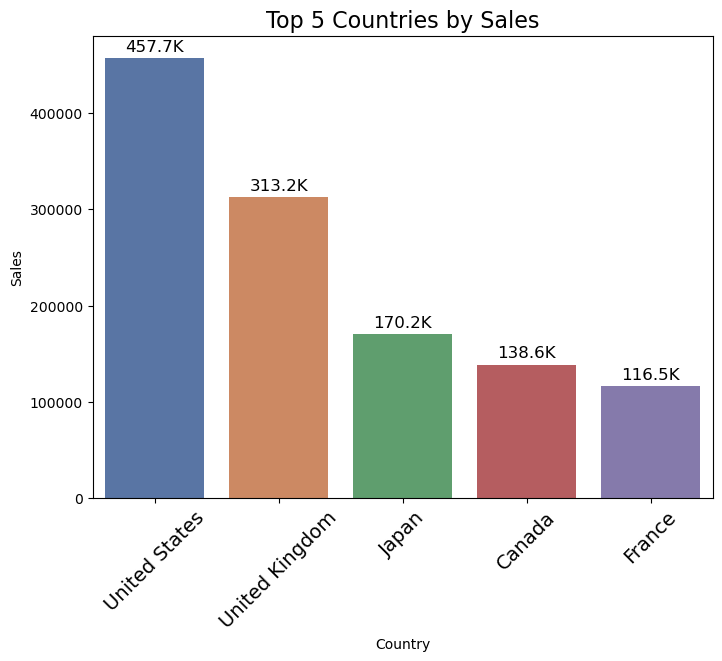

In [28]:
country_sales = data.groupby('Country')['Sales'].sum().reset_index().sort_values('Sales', ascending=False).head()

plt.figure(figsize=(8,6))

countrysales_bar = sns.barplot(data=country_sales, x='Country', y='Sales', ci=0, palette='deep')
for x in countrysales_bar.patches:
    countrysales_bar.annotate(f'{x.get_height()/1000:.1f}K', 
                   (x.get_x() + x.get_width() / 2, 
                    x.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Top 5 Countries by Sales', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.show()

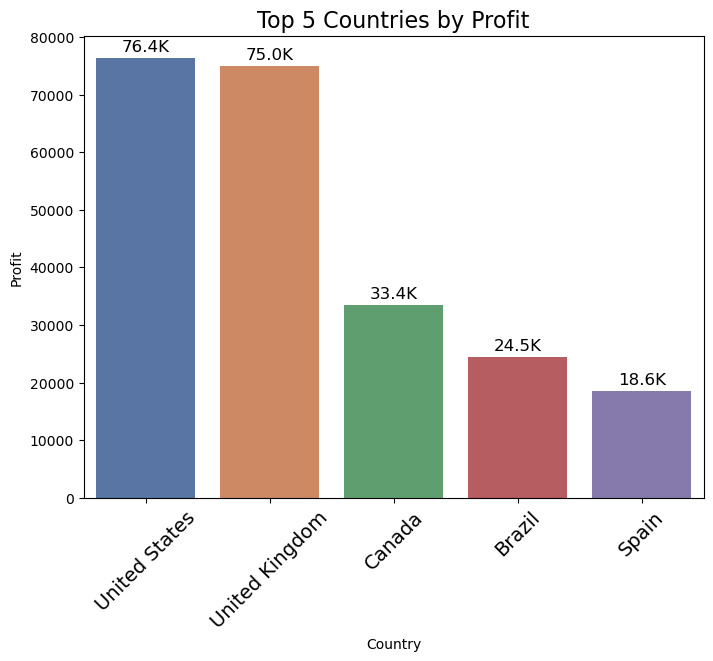

In [29]:
country_profit = data.groupby('Country')['Profit'].sum().reset_index().sort_values('Profit', ascending=False).head()

plt.figure(figsize=(8,6))

countryprofit_bar = sns.barplot(data=country_profit, x='Country', y='Profit', ci=0, palette='deep')
for x in countryprofit_bar.patches:
    countryprofit_bar.annotate(f'{x.get_height()/1000:.1f}K', 
                   (x.get_x() + x.get_width() / 2, 
                    x.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Top 5 Countries by Profit', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.show()

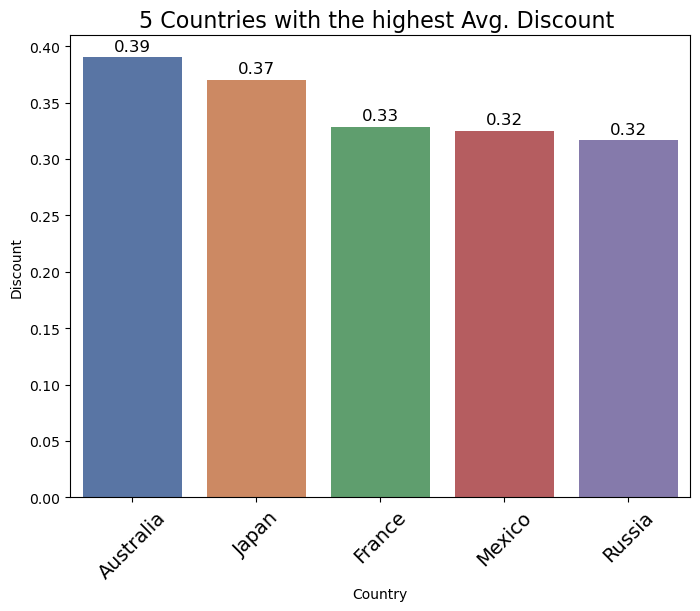

In [30]:
country_discount = data.groupby('Country')['Discount'].mean().reset_index().sort_values('Discount', ascending=False).head()

plt.figure(figsize=(8,6))

countrydiscount_bar = sns.barplot(data=country_discount, x='Country', y='Discount', ci=0, palette='deep')
for x in countrydiscount_bar.patches:
    countrydiscount_bar.annotate(format(x.get_height(), '.2f'), 
                   (x.get_x() + x.get_width() / 2, 
                    x.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('5 Countries with the highest Avg. Discount ', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.show()

**Insight:**
- 5 Negara dengan sales tertinggi adalah United States, United Kingdom, Japan, Canada, dan France.
- 5 Negara dengan profit tertinggi adalah United States, United Kingdom, Canada, Brazil, dan Spain.

**4.b. Negara dengan profit dan profit margin terendah**

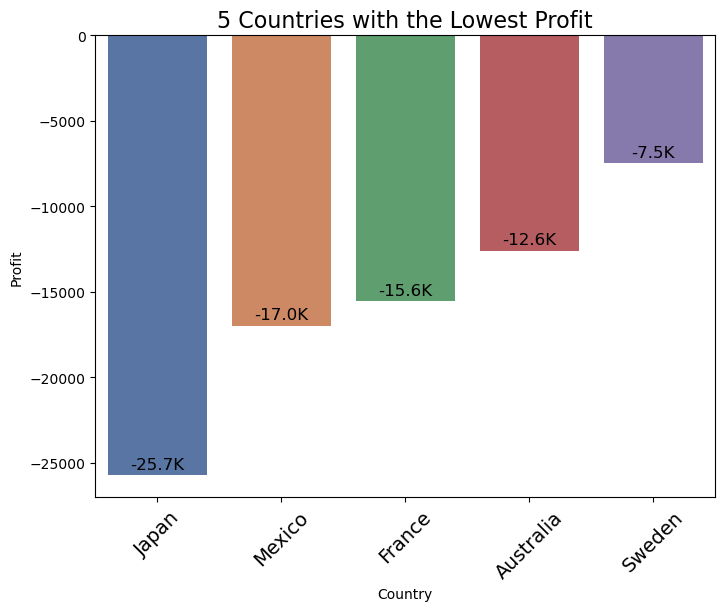

In [31]:
country_profit2 = data.groupby('Country')['Profit'].sum().reset_index().sort_values('Profit', ascending=True).head()

plt.figure(figsize=(8,6))

countryprofit_bar2 = sns.barplot(data=country_profit2, x='Country', y='Profit', ci=0, palette='deep')
for x in countryprofit_bar2.patches:
    countryprofit_bar2.annotate(f'{x.get_height()/1000:.1f}K', 
                   (x.get_x() + x.get_width() / 2, 
                    x.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('5 Countries with the Lowest Profit', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.show()

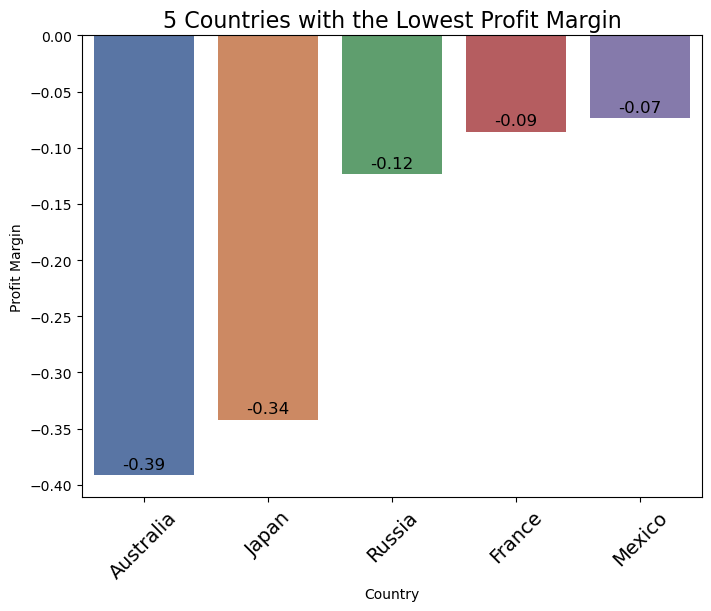

In [32]:
country_pm2 = data.groupby('Country')['Profit Margin'].mean().reset_index().sort_values('Profit Margin', ascending=True).head()

plt.figure(figsize=(8,6))

countrypm_bar2 = sns.barplot(data=country_pm2, x='Country', y='Profit Margin', ci=0, palette='deep')
for x in countrypm_bar2.patches:
    countrypm_bar2.annotate(format(x.get_height(), '.2f'), 
                   (x.get_x() + x.get_width() / 2, 
                    x.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('5 Countries with the Lowest Profit Margin', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.show()

**Insight:**
- Negara yang memiliki profit terendah adalah Japan.
- Lima negara yang memiliki profit margin terendah yaitu Australia, Japan, Rusia, France, dan Mexico.

# **Kesimpulan dan Rekomendasi**

**Kesimpulan:**
- Sales, profit, dan jumlah transaksi di Q4 setiap tahunnya selalu menjadi yang tertinggi dibandingkan quarter lainnya.
- Discount dan Sales memiliki korelasi yang sangat lemah dan negatif. Hal ini menunjukkan bahwa discount dan sales tidak memiliki hubungan yang kuat.
- Produk dengan sales yang tinggi tidak selalu menghasilkan profit dan profit margin yang tinggi. Contohnya seperti produk ContactMatcher yang memiliki sales tertinggi tetapi bukan menjadi produk dengan profit tertinggi dan rata-rata profit marginnya yang terendah dengan nilai minus.
- Pelanggan yang sering melakukan pembelian adalah Ford Motor, Allianz, Tyson Foods, Siemens, dan BNP Paribas.

- Terdapat beberapa negara yang profit dan profit marginnya rendah dan nilainya minus.

**Rekomendasi:**
- Optimasi strategi sales di Q4 untuk memaksimalkan profit.
- Evaluasi strategi diskon yang diberikan.
- Strategi diskon untuk produk yang salesnya tinggi tetapi profit marginnya rendah.
- Strategi untuk produk yang profit marginnya tinggi tetapi salesnya rendah.
- Customer Engagement: Membuat loyalty program.
- Strategi untuk negara yang profit dan profit marginnya rendah dan nilainya minus.